In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import geocoder
import matplotlib.pyplot as plt

In [129]:
train = pd.read_csv("./cleaned_train.csv")
test = pd.read_csv("./cleaned_test.csv")
sensor = pd.read_csv("./geocoded_sensor.csv")
meters = pd.read_csv("../project-data/parkingrecords.csv")

In [130]:
train.head(3)

,Unnamed: 0,Street,From,To,Date,Time,Real.Spots,Street.Length,any_spot,street_from,...,from_lat,from_long,to_lat,to_long,block_lat,block_long,hour,month,dayofweek,is_weekend
0,0,Mission Street,25th Street,26th Street,2014-01-07,16:19,4,179.13297,1,"Mission Street & 25th Street, San Francisco CA",...,37.750648,-122.418316,37.749044,-122.418166,37.749846,-122.418241,16,1,1,0
1,1,Polk Street,Ellis Street,Olive Street,2014-01-18,20:42,0,52.74021,0,"Polk Street & Ellis Street, San Francisco CA",...,37.784040,-122.419381,37.784507,-122.419478,37.784273,-122.419429,20,1,5,1
2,2,Van Ness Avenue,Geary Boulevard,Myrtle Street,2014-01-18,20:39,0,52.51784,0,"Van Ness Avenue & Geary Boulevard, San Francis...",...,37.785660,-122.421476,37.785241,-122.421234,37.785451,-122.421355,20,1,5,1


In [131]:
#remove outliers
train = train[train['Real.Spots'] < 30]

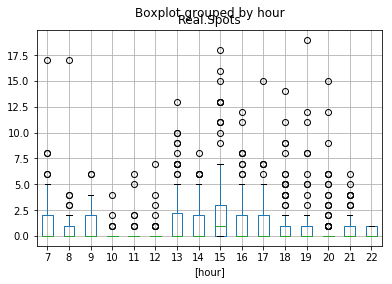

In [132]:
tmp = train[train['Real.Spots'] < 20]
metric = 'hour'
y = 'Real.Spots'
tmp.boxplot(column=y, by=[metric])

### plotting data

#### train plot

In [133]:
train['block_id'] = train.groupby(['Street','From',"To"]).ngroup()

In [135]:
len(train['block_id'].unique())

93

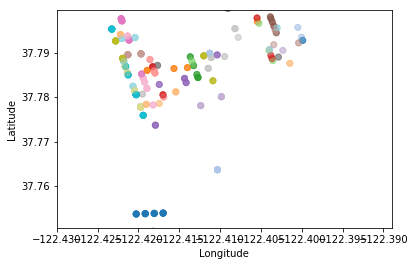

In [134]:
city_long_border = (-122.43, -122.389)
city_lat_border = (37.75064, 37.7995)
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.block_long.values, train.block_lat.values, alpha=0.2, c=train.block_id.values, cmap='tab20')
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


#### test plot

In [156]:
test['block_id'] = test.groupby(['Street','From',"To"]).ngroup()

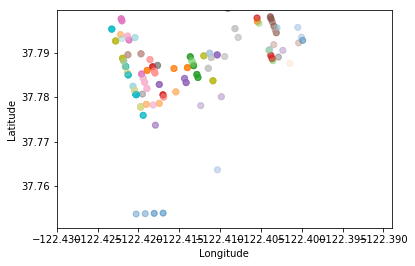

In [157]:
city_long_border = (-122.43, -122.389)
city_lat_border = (37.75064, 37.7995)
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(test.block_long.values, test.block_lat.values, alpha=0.2, c=test.block_id.values, cmap='tab20')
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


#### sensor plot

In [98]:
sensor.head(5)

,Unnamed: 0,BLOCK_ID,STREET_NAME,BLOCK_NUM,STREET_BLOCK,AREA_TYPE,PM_DISTRICT_NAME,RATE,START_TIME_DT,TOTAL_TIME,...,COMM_UNKNOWN_TIME,CAL_MONTH_NAME,CAL_YEAR,CAL_DATE,DAY_TYPE,TIME_OF_DAY,STREET_BLOCK_renamed,coord_block,block_lat,block_long
0,2,50001,jackson street,1.0,JACKSON ST 100,Pilot,Downtown,NaN,01-jul-2012 02:00:00,79200.0,...,0.0,July,2012.0,01-jul-2012,weekend,200.0,"JACKSON ST 100, San Francisco, CA","[37.7970989, -122.3983614]",37.797099,-122.398361
1,3,50002,jackson street,2.0,JACKSON ST 200,Pilot,Downtown,NaN,01-jul-2012 08:00:00,82800.0,...,0.0,July,2012.0,01-jul-2012,weekend,800.0,"JACKSON ST 200, San Francisco, CA","[37.7970291, -122.3999589]",37.797029,-122.399959
2,11,50004,jackson street,4.0,JACKSON ST 400,Pilot,Downtown,NaN,01-jul-2012 21:00:00,118800.0,...,0.0,July,2012.0,01-jul-2012,weekend,2100.0,"JACKSON ST 400, San Francisco, CA","[37.7966327, -122.4018831]",37.796633,-122.401883
3,12,50023,jackson street,23.0,JACKSON ST 2300,Pilot,Fillmore,NaN,01-jul-2012 05:00:00,28800.0,...,0.0,July,2012.0,01-jul-2012,weekend,500.0,"JACKSON ST 2300, San Francisco, CA","[37.7926875, -122.4329514]",37.792687,-122.432951
4,19,50228,jones street,28.0,JONES ST 2800,Pilot,Fisherman's Wharf,3.5,01-jul-2012 16:00:00,28800.0,...,0.0,July,2012.0,01-jul-2012,weekend,1600.0,"JONES ST 2800, San Francisco, CA","[37.8071494, -122.4172899]",37.807149,-122.417290


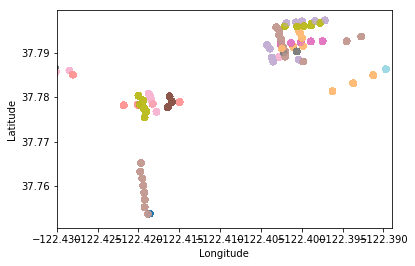

In [97]:
city_long_border = (-122.43, -122.389)
city_lat_border = (37.75064, 37.7995)
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(sensor.block_long.values, sensor.block_lat.values, alpha=0.2, c=sensor.BLOCK_ID.values, cmap='tab20')
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()


#### meters plot

In [170]:
meters['block_id'] = meters.groupby(['lat','lon']).ngroup()

In [171]:
meters.head(2)

,lat,lon,datetime,block_id
0,37.771637,-122.437112,1471967637400,8710
1,37.777229,-122.465370,1459821377952,11364


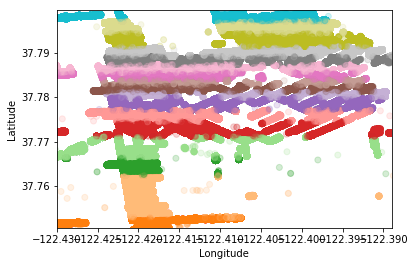

In [174]:
city_long_border = (-122.43, -122.389)
city_lat_border = (37.75064, 37.7995)
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(meters.lon.values, meters.lat.values, alpha=0.2, c=meters.block_id.values, cmap='tab20')
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

#### combined plot

In [150]:
sensor2 = sensor[['block_lat', 'block_long']]
sensor2['type'] = 1

/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [151]:
train2 = train[['block_lat', 'block_long']]
train2['type'] = 2

/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [152]:
test2 = test[['block_lat', 'block_long']]
test2['type'] = 3

/anaconda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [153]:
places = pd.concat([sensor2, train2, test2])

In [154]:
places.head(3)

,block_lat,block_long,type
0,37.797099,-122.398361,1
1,37.797029,-122.399959,1
2,37.796633,-122.401883,1


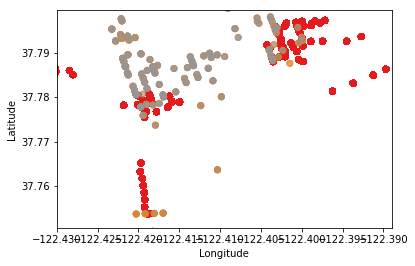

In [155]:
city_long_border = (-122.43, -122.389)
city_lat_border = (37.75064, 37.7995)
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(places.block_long.values, places.block_lat.values, alpha=0.2, c=places.type.values, cmap='Set1')
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()
#red = sensor 
#grey = test, brown = train